# Word Cloud English (Review Amazon Alexa)
* doc: https://amueller.github.io/word_cloud/index.html
* installation:
    * pip install wordcloud
    * conda install -c conda-forge wordcloud

---
* author:  [Prasert Kanawattanachai](prasert.k@chula.ac.th)
* YouTube: https://www.youtube.com/prasertcbs
* [Chulalongkorn Business School](https://www.cbs.chula.ac.th/en/)
---

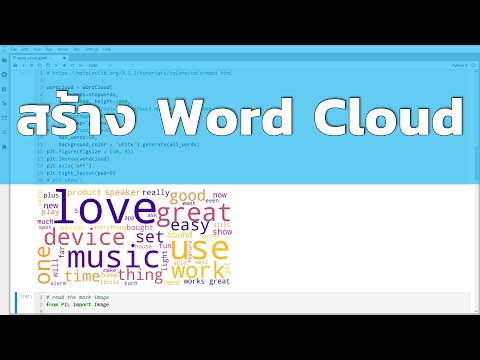

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('6pcQ5Vi8rUw', width=720, height=405)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import wordcloud
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
print(f'pandas    version: {pd.__version__}')
print(f'numpy     version: {np.__version__}')
print(f'wordcloud version: {wordcloud.__version__}')

pandas    version: 1.1.5
numpy     version: 1.19.2
wordcloud version: 1.8.1


In [4]:
pd.Timestamp.now()

Timestamp('2020-12-16 21:59:29.302311')

<img src=https://images-na.ssl-images-amazon.com/images/I/6182S7MYC2L._AC_SL1000_.jpg width=400 />

In [5]:
# https://www.kaggle.com/sid321axn/amazon-alexa-reviews
url='https://github.com/prasertcbs/basic-dataset/raw/master/amazon_alexa.tsv'
df=pd.read_csv(url, sep='\t')
df[:5]

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [6]:
word_col='verified_reviews'

In [7]:
all_words = ' '.join(df[word_col]).lower()
all_words[:500]

'love my echo! loved it! sometimes while playing a game, you can answer a question correctly but alexa says you got it wrong and answers the same as you.  i like being able to turn lights on and off while away from home. i have had a lot of fun with this thing. my 4 yr old learns about dinosaurs, i control the lights and play games like categories. has nice sound when playing music as well. music i received the echo as a gift. i needed another bluetooth or something to play music easily accessibl'

In [8]:
stopwords = set(STOPWORDS)
stopwords.update(["echo", "alexa", "dot", "amazon"])

In [9]:
print(stopwords)

{'in', 'cannot', "haven't", 'or', 'hers', 'those', 'themselves', 'when', 'up', 'to', 'where', 'com', 'too', "we'd", "she's", 'having', "they'll", 'while', "didn't", 'between', 'we', 'until', 'what', 'hence', 'as', 'few', 'no', 'against', 'on', 'such', 'than', "what's", "she'll", 'nor', 'they', 'theirs', 'ought', 'out', 'alexa', 'them', 'doing', "it's", "wouldn't", "there's", "isn't", 'during', 'who', "you'd", 'whom', 'does', "he's", "where's", 'both', 'his', 'because', 'would', "that's", 'www', 'it', 'other', "we're", "here's", 'did', "hasn't", "couldn't", "doesn't", 'amazon', 'be', 'could', 'each', 'r', 'there', 'my', 'just', 'has', 'into', "you've", "don't", 'i', "they've", 'yourselves', 'how', 'very', "we've", 'were', 'down', 'him', "hadn't", 'have', 'a', 'however', "you're", 'then', 'and', 'its', "let's", 'above', 'are', "can't", 'if', 'further', "i'd", 'at', "i'll", 'her', "weren't", 'once', 'can', 'for', "he'd", 'is', 'http', 'being', 'below', 'most', 'under', "won't", 'after', '

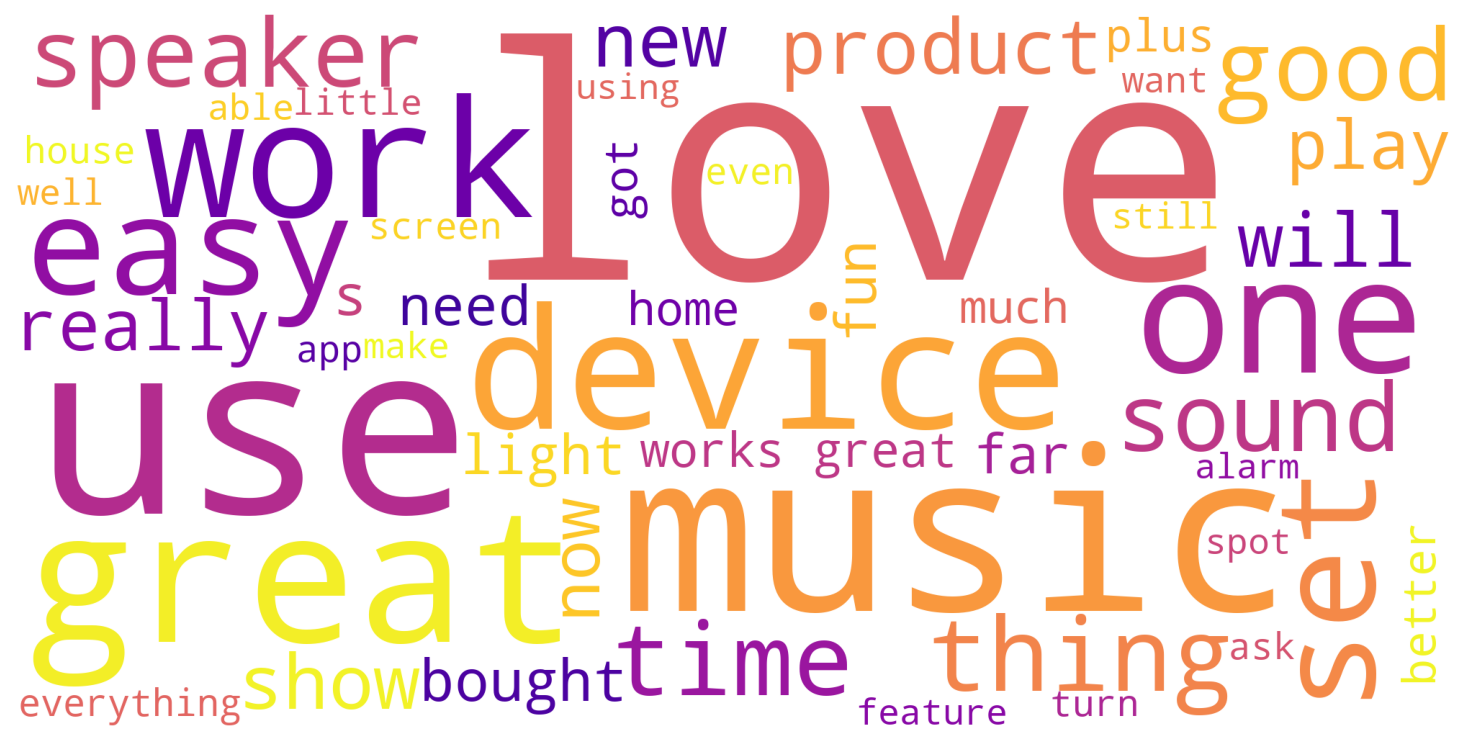

In [10]:
# https://matplotlib.org/3.3.3/tutorials/colors/colormaps.html

wordcloud = WordCloud(
    stopwords=stopwords,
    width=2000, height=1000,
#     colormap='viridis', # default matplotlib colormap
#     colormap='tab20c',
    colormap='plasma',
#     max_font_size=50, 
    max_words=50, 
    background_color = 'white').generate(all_words)
plt.figure(figsize = (10, 9))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
# plt.show()

In [11]:
import requests
import io
def download_img(url, imgfilename=None):
    '''
    download image from url
    '''
    r=requests.get(url)
    return io.BytesIO(r.content)

In [12]:
# read the mask image
from PIL import Image

# mask_img_file='cloud.png'
mask_img_file='speaker.png'
# mask_img_file='A_mask.png'

# read mask image from local
# mask = np.array(Image.open(f'mask_image/{mask_img_file}').convert('RGBA'))

# read mask image from url
img_url=f'https://github.com/prasertcbs/img/raw/master/mask/{mask_img_file}'
mask = np.array(Image.open(download_img(img_url)).convert('RGBA'))

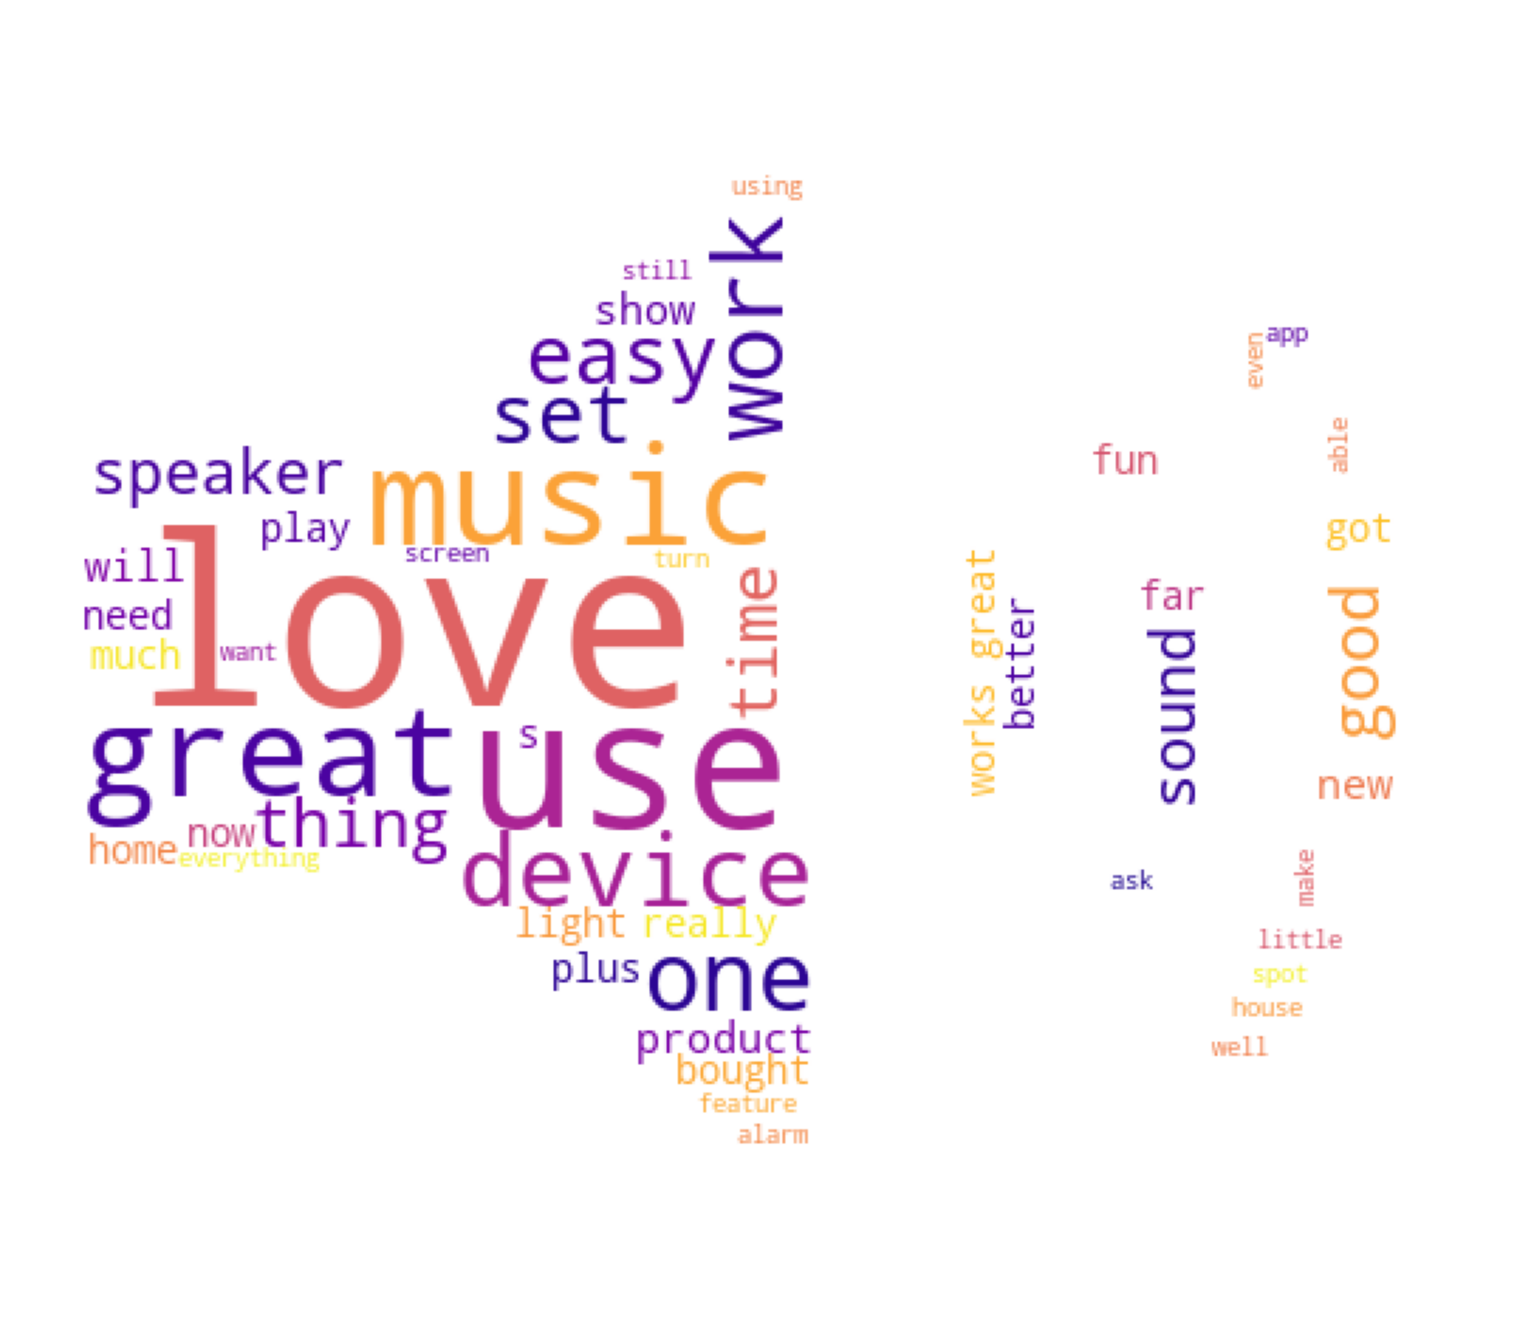

In [13]:
# https://matplotlib.org/3.3.3/tutorials/colors/colormaps.html

wordcloud = WordCloud(
    stopwords=stopwords,
    width=2000, height=1000,
#     colormap='viridis', # default matplotlib colormap
#     colormap='tab20c',
    colormap='plasma',
#     max_font_size=50, 
    max_words=50, 
    mask=mask,
    background_color = 'white').generate(all_words)
plt.figure(figsize = (16, 9))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [14]:
wordcloud.words_

{'love': 1.0,
 'use': 0.4984583761562179,
 'music': 0.4244604316546763,
 'great': 0.42137718396711205,
 'device': 0.34121274409044194,
 'work': 0.32476875642343267,
 'one': 0.31654676258992803,
 'easy': 0.29290853031860226,
 'set': 0.29290853031860226,
 'thing': 0.26002055498458376,
 'time': 0.2528263103802672,
 'good': 0.24563206577595068,
 'speaker': 0.2302158273381295,
 'sound': 0.22918807810894143,
 'product': 0.20554984583761562,
 'show': 0.20246659815005139,
 'will': 0.19835560123329907,
 'new': 0.1963001027749229,
 'really': 0.1778006166495375,
 'now': 0.1685508735868448,
 'play': 0.16752312435765673,
 'bought': 0.16752312435765673,
 's': 0.16238437821171633,
 'fun': 0.1593011305241521,
 'light': 0.15210688591983557,
 'need': 0.1510791366906475,
 'far': 0.14902363823227133,
 'works great': 0.14799588900308325,
 'home': 0.1408016443987667,
 'much': 0.13566289825282632,
 'got': 0.13052415210688592,
 'better': 0.13052415210688592,
 'plus': 0.12846865364850976,
 'everything': 0.1233

In [15]:
wordcloud.to_file("wordcloud.png")